<h1 style="color:#D81B60;">Exploratory Data Analysis (EDA) — Online Retail II Dataset</h1>
<h2 style="color:#006400;">CodeAlpha Data Analytics Internship - Task 2</h2>
<h3 style="color:#D81B60;">Author: <b>Simitha Ummer</b></h3>
<h3 style="color:#800080;">Date: November 2025</h3>

### 1. Introduction

#### Objective

- Perform Exploratory Data Analysis (EDA) on the Online Retail II Dataset to:

- Clean missing and invalid records

- Identify top customers and products

- Explore sales trends and regional patterns

- Generate business insights for decision-making

#### Dataset Description

- Dataset Source: **Kaggle** - https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
- The dataset contains all transactions from a UK-based online retail store between 2009–2011.
- Each record represents one product sold in an invoice.

**Columns:**

`Invoice`: Invoice number (unique per transaction)

`StockCode`: Product code

`Description`: Product name

`Quantity`: Number of items purchased

`InvoiceDate`: Date and time of transaction

`Price`: Price per unit

`Customer ID`: Unique ID of customer

`Country`: Customer location

### 2. Import Libraries & Load Dataset

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
raw_df = pd.read_csv("C:/Users/Simitha/Downloads/online_retail_II.csv")

print("Dataset Loaded Successfully!")

# Display first few rows
raw_df.head()

Dataset Loaded Successfully!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 3. Explore Data Structure

In [3]:
# Basic info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
# Shape of dataset
print(f"Dataset contains {raw_df.shape[0]} rows and {raw_df.shape[1]} columns.")

Dataset contains 1067371 rows and 8 columns.


In [5]:
# Summary statistics
raw_df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
df = raw_df.copy()

### 4. Data Cleaning
#### 4.1 Check Missing Values

In [7]:
# Checking for missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
df.isnull().sum()/(len(df))*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

**Handle Missing Values**

In [9]:
# Drop rows with missing Customer ID
df = df.dropna(subset=['Customer ID'])

# Fill missing product descriptions
df['Description'] = df['Description'].fillna("Unknown Product")

# Check again
print("Missings values after cleaning:")
df.isnull().sum()

Missings values after cleaning:


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

#### 4.2 Check Duplicates

In [10]:
# Checking for duplicates
print("Duplicate rows:",df.duplicated().sum())

Duplicate rows: 26479


In [11]:
df = df.drop_duplicates()
print("Duplicate rows after cleaning:", df.duplicated().sum())

Duplicate rows after cleaning: 0


#### 4.3 Remove Negative or Zero Quantities and Prices

In [12]:
# Filter only positive Quantity and Price(Remove canceled or invalid transactions)
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

#### 4.4 Fix Data Types

In [13]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert Customer ID to integer
df['Customer ID'] = df['Customer ID'].astype(int)

In [14]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int64
Country                object
dtype: object

**4.5 Data Cleaning: Completed**

In [15]:
print("Shape before cleaning:", raw_df.shape)
print("Shape after cleaning:", df.shape)

Shape before cleaning: (1067371, 8)
Shape after cleaning: (779425, 8)


In [16]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom


**4.6 Missing Values Comparison**


 Missing Values Comparison:
             Before Cleaning (%)  After Cleaning (%)
Invoice                     0.00                 0.0
StockCode                   0.00                 0.0
Description                 0.41                 0.0
Quantity                    0.00                 0.0
InvoiceDate                 0.00                 0.0
Price                       0.00                 0.0
Customer ID                22.77                 0.0
Country                     0.00                 0.0


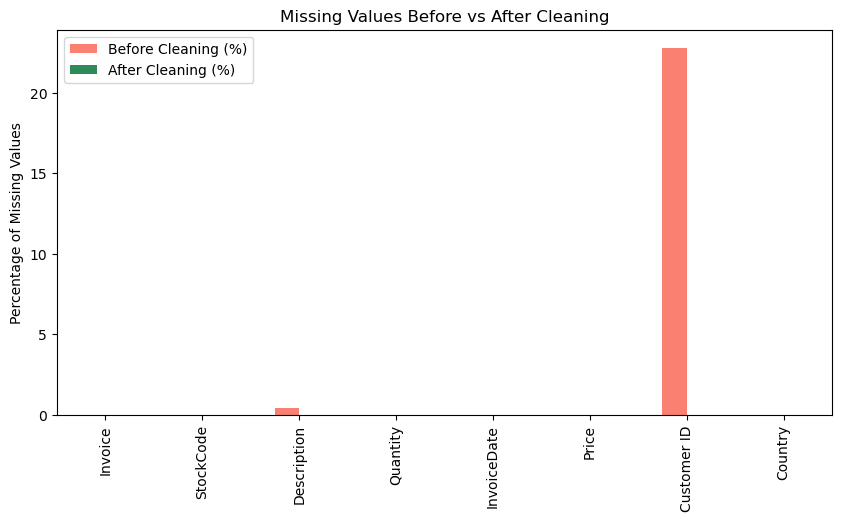

In [17]:
missing_before = raw_df.isnull().mean() * 100
missing_after = df.isnull().mean() * 100

missing_compare = pd.DataFrame({
    'Before Cleaning (%)': missing_before,
    'After Cleaning (%)': missing_after
}).round(2)

print("\n Missing Values Comparison:")
print(missing_compare)

# Bar plot comparison
missing_compare.plot(kind='bar', figsize=(10,5), color=['salmon','seagreen'])
plt.title('Missing Values Before vs After Cleaning')
plt.ylabel('Percentage of Missing Values')
plt.show()

### 5. Feature Engineering
#### 5.1 Create TotalSales column

In [18]:
df['TotalSales'] = df['Quantity'] * df['Price']
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0


#### 5.2 Extract Year, Month, and Day

In [19]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.strftime('%B')
df['Day'] = df['InvoiceDate'].dt.day
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,Year,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,December,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,December,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,December,1


### 6. Save Cleaned File

In [20]:
df.to_csv("Online_Retail_II_Cleaned.csv", index=False)
print("Cleaned data saved as 'Online_Retail_II_Cleaned.csv'")

Cleaned data saved as 'Online_Retail_II_Cleaned.csv'


### 7. Exploratory Data Analysis (EDA)
#### 7.1 Univariate Analysis
##### **a) Price Distribution**

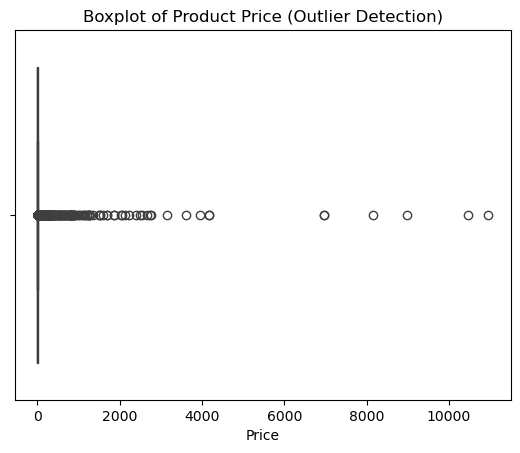

In [21]:
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Product Price (Outlier Detection)')
plt.show()

**Observations**
- The boxplot shows **amost product prices are very low**, clustered near the bottom of the scale.
- There are **many extreme outliers**, with some prices going above **10,000**.
- The price distribution is **highly right-skewed**, meaning only a few items are very expensive.
- These outliers may represent **premium items** or **potential data entry errors**.

#### 7.2 Bivariate Analysis
##### **a) Top 10 Countries by Total Sales**

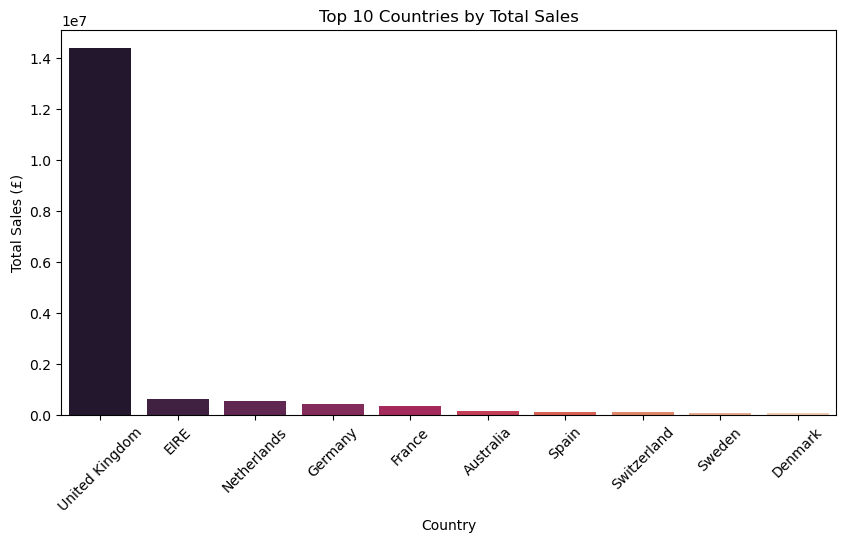

In [22]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values,palette="rocket")
plt.title("Top 10 Countries by Total Sales")
plt.ylabel("Total Sales (£)")
plt.xticks(rotation=45)
plt.show()

**Observations**
- The **United Kingdom overwhelmingly dominates total sales**, contributing far more revenue than any other country.
- The UK’s total sales exceed **14 million**, while the next highest countries (EIRE, Netherlands, Germany, France) contribute only a **small fraction** of this amount.
- Sales in other countries show a **long-tail distribution**, indicating that international markets are active but significantly smaller.

##### **b) Top 10 Products by Quantity Sold**

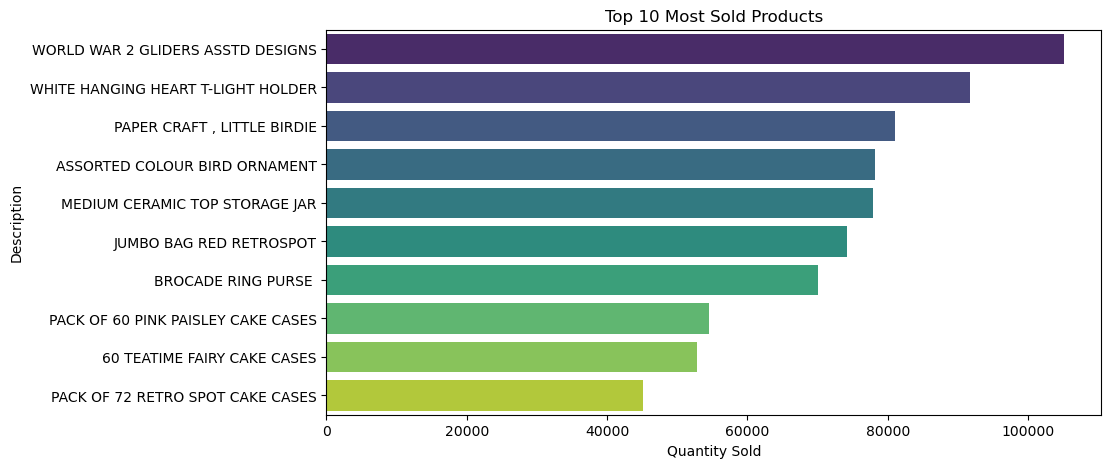

In [23]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index,palette="viridis")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.show()

**Observations**
- **WORLD WAR 2 GLIDERS ASSTD DESIGNS** is the best-selling product, significantly outperforming all others in quantity sold.
- Decorative and craft-related items such as **T-light holders, paper crafts, bird ornaments, and ceramic jars** also dominate the top-selling list.
- Most top-selling products are **small, low-cost, fast-moving items**, suggesting high customer demand for affordable decorative goods.
- Multiple **cake case packs** appear in the top 10, indicating consistent demand for baking accessories.

##### **c) Quantity vs Total Sales**

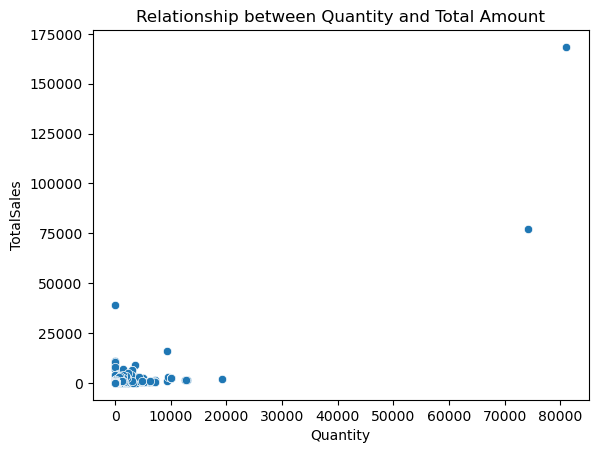

In [24]:
sns.scatterplot(x='Quantity', y='TotalSales', data=df)
plt.title('Relationship between Quantity and Total Amount')
plt.show()

**Observations**
- There is a **general positive relationship** between quantity sold and total sales — higher quantities typically lead to larger total revenue.
- Most data points are clustered at **low quantities and low total sales**, indicating that the majority of transactions involve small purchase volumes.
- A few **extreme outliers** (e.g., quantities above 50,000 and sales above 150,000) significantly lift overall revenue, likely representing **bulk or wholesale orders**.
- The spread suggests that **product price variation** also affects total sales — some items generate high revenue even at moderate quantities.

##### **d) Country-Wise Average Transaction Value**

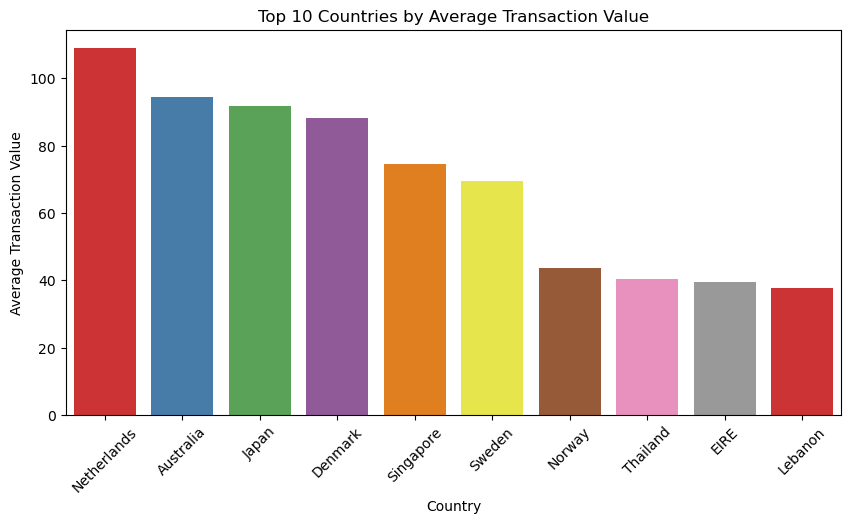

In [25]:
avg_country = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_country.index, y=avg_country.values,palette='Set1')
plt.title("Top 10 Countries by Average Transaction Value")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=45)
plt.show()

**Observations**
- **Netherlands** has the highest average transaction value, indicating that customers there tend to make **larger and higher-value purchases** per transaction.
- Countries like **Australia, Japan, and Denmark** also show strong average transaction values, suggesting **more premium or bulk buying behavior** compared to other regions.
- Countries at the lower end of the chart — **Norway, Thailand, EIRE, and Lebanon** — show **smaller average purchases**, which may reflect lower spending behavior or smaller order sizes.
- These variations suggest that customer purchasing behavior **differs significantly across countries**.

#### 7.3 Multivariate Analysis
##### **a) Pairplot (Quantity, Price, TotalSales)**

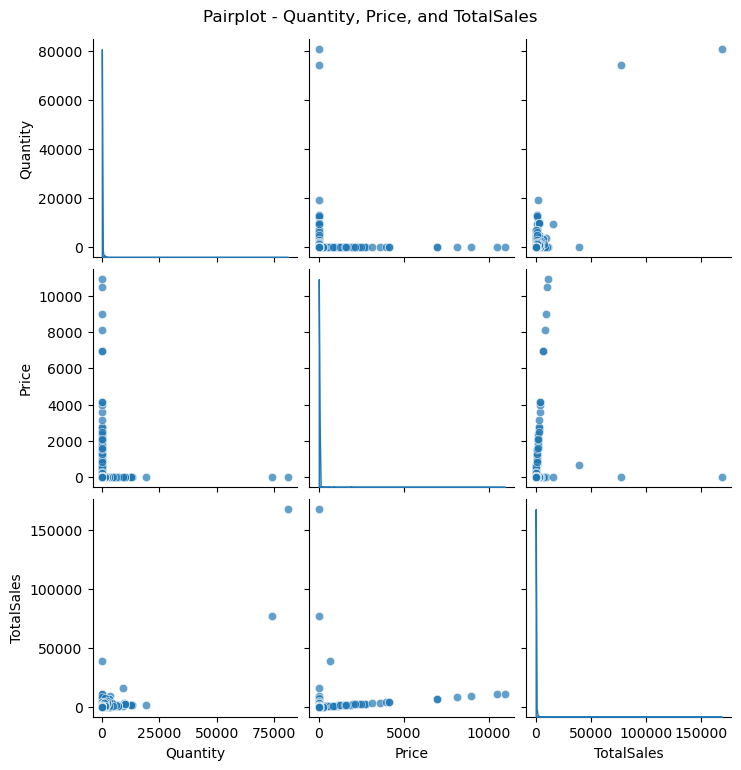

In [26]:
sns.pairplot(df[['Quantity', 'Price', 'TotalSales']], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pairplot - Quantity, Price, and TotalSales', y=1.02)
plt.show()

**Observations**
- Most data points for **Quantity, Price, and TotalSales** are heavily clustered near the lower ranges, which is expected in retail datasets where small orders are common.
- There are **several extreme outliers** in all three variables, especially:
   - Quantities above **50,000**
   - Prices above **10,000**
   - TotalSales above **150,000**
   - These represent either **bulk orders, premium-priced items, or potential data entry anomalies**.
1. **Quantity vs Price:**
   - **Most high-quantity** purchases are paired with **very low prices**.
   - This suggests bulk orders typically involve **low-cost products**, which is consistent with wholesale behavior.

2. **Quantity vs TotalSales:**
   - A positive trend is visible
   - **Higher quantities generally lead to higher TotalSales**, though the relationship is not perfectly linear due to varying prices.

3. **Price vs TotalSales:**
   - Most high-price products have low quantities, but still contribute significantly to TotalSales.
   - This indicates a **small set of premium items** that generate disproportionately high revenue

#### 7.4 Time Series Analysis
##### **a) Monthly Sales Trend**

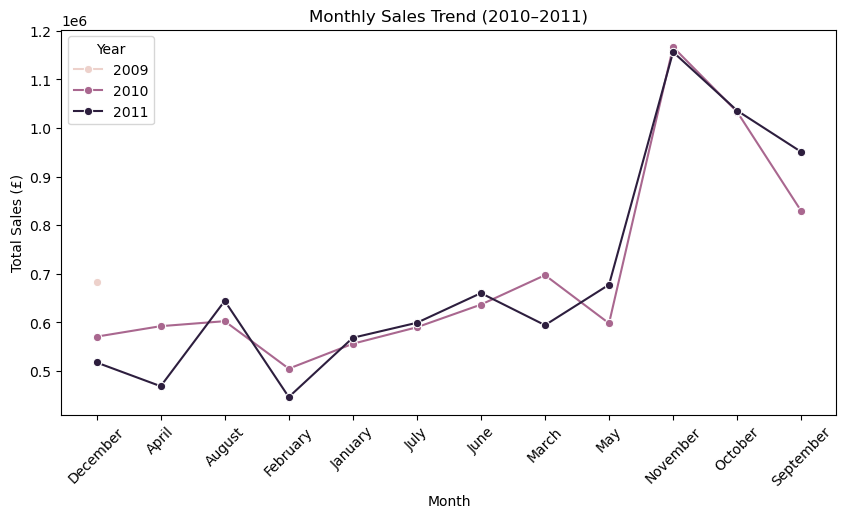

In [27]:
monthly_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='TotalSales', hue='Year', data=monthly_sales, marker='o',color="green")
plt.title("Monthly Sales Trend (2010–2011)")
plt.ylabel("Total Sales (£)")
plt.xticks(rotation=45)
plt.show()

**Observations**
- Across all years shown, **sales remain relatively steady from January to around July**, with only small fluctuations.
- A noticeable **dip occurs around February**, indicating a consistently slower sales period during that month.
- Sales begin to **pick up from August onward**, showing a rising trend into early Q4.
- The **strongest and sharpest increase** happens between **October and November**, where sales jump dramatically, followed by a slight drop in December.
- This clearly indicates a **peak sales season in November**, likely tied to holiday shopping or seasonal spikes.

##### **b) Sales by Weekday**

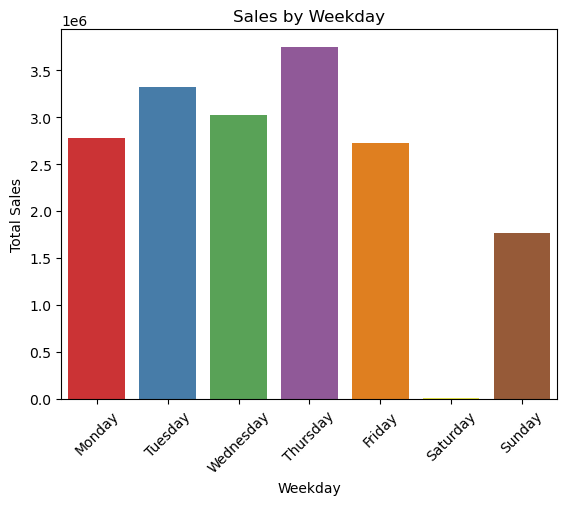

In [28]:
df["Weekday"] = df["InvoiceDate"].dt.day_name()
weekday_sales = df.groupby("Weekday")["TotalSales"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="Set1")
plt.title("Sales by Weekday")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

**Observations**
- **Thursday** records the highest total sales compared to other weekdays, indicating strong mid-week customer activity.
- **Tuesday and Wednesday** also show strong sales volumes, forming the second-highest performing group.
- **Monday and Friday** have similar sales levels, slightly lower than mid-week but still stable.
- **Sunday** has the lowest sales, indicating minimal customer transactions on weekends.
- **Saturday** appears extremely low or almost zero, which suggests **either very few transactions occur on Saturdays or data is missing/not recorded for Saturdays** in the dataset.

#### 7.5 Correlation Analysis

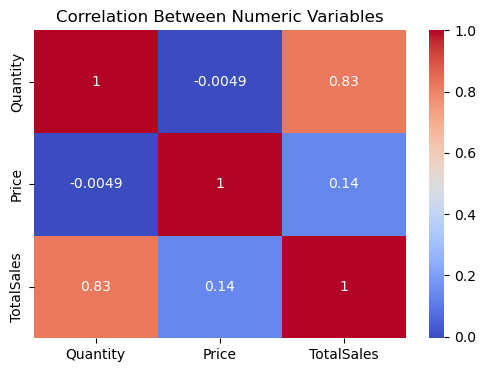

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'Price', 'TotalSales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables")
plt.show()

**Observations**
- **Quantity and TotalSales** show a **strong positive correlation** (0.83).
- This means that transactions involving higher quantities almost always result in higher total sales — as expected in retail environments.
- **Price and TotalSales** have a **weak positive correlation** (0.14).
- This suggests that product price alone does not drive revenue significantly; instead, **quantity sold** is the main factor.
- **Quantity and Price** have almost **weak negative correlation** (-0.0049).
- This indicates that **low-priced products can be sold in high quantities**, while expensive items tend to sell in **low quantities**, which is typical of mixed retail product catalogs.

### 8. Hypothesis Testing

In [30]:
from scipy.stats import ttest_ind

uk_sales = df[df['Country'] == 'United Kingdom']['TotalSales']
non_uk_sales = df[df['Country'] != 'United Kingdom']['TotalSales']

t_stat, p_val = ttest_ind(uk_sales, non_uk_sales, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.5f}")

if p_val < 0.05:
    print("Significant difference: UK transactions differ from other countries.")
else:
    print("No significant difference found.")

T-statistic: -39.1769, P-value: 0.00000
Significant difference: UK transactions differ from other countries.


**Observations**
- There is a **significant difference** between the total sales amount of UK transactions and transactions from other countries.
- This confirms that the UK’s sales patterns are **not similar** to international markets—they are **substantially higher**.

### 9. Detect Outliers

Outliers detected: 63562


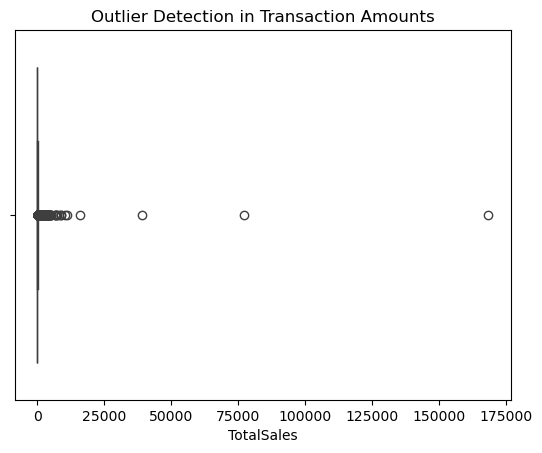

In [31]:
Q1 = df['TotalSales'].quantile(0.25)
Q3 = df['TotalSales'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['TotalSales'] < Q1 - 1.5*IQR) | (df['TotalSales'] > Q3 + 1.5*IQR)]
print("Outliers detected:", len(outliers))

sns.boxplot(x=df['TotalSales'])
plt.title("Outlier Detection in Transaction Amounts")
plt.show()

**IQR-Based Outlier Count**
- Using the IQR (Interquartile Range) method, 63,562 **outliers** were detected in the ``TotalSales`` column.
- This is a **very large number of outliers**, indicating that the distribution of transaction amounts is **highly skewed**.

**Observations**
- Most transaction amounts are tightly concentrated near the **lower end** of the scale.
- Several **extreme high-value outliers** are scattered far from the main cluster, representing transactions above **25,000, 50,000, 75,000, and even 150,000**.
- These extreme values likely correspond to:
    - **Bulk orders**
    - **Wholesale transactions**
    - **High-priced premium items**
    - **Potential data entry errors** (e.g., missing decimal points, extra zeros)

### 10. Insights and Recommendations

In [32]:
print('--- KEY INSIGHTS ---')
print(f"Total Revenue: {df['TotalSales'].sum():,.2f}")
print(f"Unique Customers: {df['Customer ID'].nunique()}")
print(f"Total Products Sold: {df['Quantity'].sum():,}")

--- KEY INSIGHTS ---
Total Revenue: 17,374,804.27
Unique Customers: 5878
Total Products Sold: 10,513,952


#### **Business Insights:**
##### **a) Customer & Market Insights**
- The **United Kingdom overwhelmingly** dominates **total sales**, far exceeding every other country.
- International markets (e.g., Netherlands, EIRE, Germany, France) show activity but remain **much smaller contributors**.
- The UK behaves as a **distinct, high-performing market**, with transaction patterns significantly different from other countries.
- Countries like **Netherlands, Australia, and Japan** have **higher average transaction values**, indicating premium or bulk-purchase behavior.
##### **b) Product Insights**
- Best-selling products are **low-priced, fast-moving decorative or craft items** (e.g., T-light holders, ornaments, storage jars).
- Cake cases appear multiple times in top sellers, indicating a **strong niche segment** in baking/party supplies.
- Large revenue spikes come from **few bulk buyers** or high-quantity orders.
##### **c) Sales Behavior Insights**
- **Quantity** has the **strongest correlation** with **TotalSales** — revenue is **quantity-driven**, not price-driven.
- **Price** has **little correlation with quantity**, indicating **low-price items often sell in high volumes**, while expensive items sell in low quantities.
- Revenue is influenced by two key customer types:
     - **High-quantity, low-price buyers**
     - **Low-quantity, high-price buyers**
##### **d) Time-Based Insights**
- Strong seasonal patterns: **November is the peak sales month**, driven by holiday shopping.
- Sales **dip in February** consistently.
- Weekly trends show **higher sales on weekdays**, especially **Tuesday to Thursday**.
- **Sunday and Saturday** have significantly lower sales, with Saturday showing almost no activity (possible operational or logging issue).
#### **e) Data Characteristics**
- Product **price distribution is highly right-skewed**, containing many premium outliers.
- **TotalSales distribution** shows a **large number of extreme high-value outliers**, representing bulk/wholesale orders.
- Outliers are meaningful and represent **actual business behavior**, not noise.

#### **Recommendations:**
##### **a) Market & Revenue Strategy**
- Strengthen marketing, logistics, and customer retention efforts in the **UK**, which drives the majority of revenue.
- Target higher-potential international markets (Netherlands, Australia, France, Germany) with **localized promotions**.
- Develop separate strategies for **bulk buyers** (large orders) and **regular customers** (small orders).
##### **b) Product Strategy**
- Maintain strong inventory for **top-selling low-cost items** like T-light holders, ornaments, cake cases, and craft products.
- Promote **cross-selling and product bundles** around popular product themes (e.g., home decor, crafts, party supplies).
- Investigate premium, high-priced items to ensure accurate pricing and explore potential **premium customer segments**.
##### **c) Pricing & Sales Optimization**
- Create **volume discount programs** for high-quantity buyers and wholesale customers.
- For premium products, use **targeted marketing** since these do not sell frequently but contribute high revenue.
- Avoid relying on price increases alone — focus on strategies that **increase quantity sold**.
##### **d) Seasonal & Weekly Planning**
- Increase inventory and marketing during **peak months (October–December)**.
- Run **promotional campaigns in February** to offset consistent sales dips.
- Boost weekend engagement with **exclusive online offers**, especially for Saturday and Sunday.
##### **e) Data Quality & Outlier Handling**
- Do **not remove outliers**, as they represent real high-value transactions.
- Validate extreme price or quantity values to identify **possible data entry errors**.
- Use **log transformations or robust metrics** for modeling due to skewed distributions.
- Examine Saturday’s near-zero sales to identify **operational or data recording issues**.
##### **f) Customer Segmentation & Insight**
- Identify key **bulk-purchase customers** and create specialized retention or loyalty programs.
- Segment premium product buyers for **targeted upsell strategies**.
- Analyze high-value outlier transactions for understanding customer needs and patterns.

### 11. Conclusion

This EDA shows that the **United Kingdom is the main revenue hub**, contributing the majority of total sales, while other countries show smaller but growing potential. Sales are mainly driven by **high quantities of low-priced products**, especially decorative and craft items, which dominate the top-selling list. Seasonal patterns indicate a strong **sales peak in November** and low activity in February. Weekdays, particularly **Tuesday to Thursday**, generate the highest sales, while weekends remain weak.

The data contains many high-value outliers, representing **bulk or premium transactions**, which are important for revenue and should not be removed. Overall, the business relies on frequent small orders and occasional large purchases, highlighting opportunities for better **inventory planning, targeted marketing, and customer segmentation**.